In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%reload.ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px


UsageError: Line magic function `%reload.ext` not found.


In [170]:
unicorn = pd.read_csv('Unicorntable_india.csv')
unicorn

,No.,Company,Sector,Publicly Listed,Entry Valuation($B),Valuation ($B),Entry,Formar Unicorn,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,0,1.00,1.00,11-Sep,0,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart,E-Commerce,1,1.00,37.60,12-Feb,0,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,0,1.00,1.50,13-Feb,0,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal,E-Commerce,0,1.80,2.40,14-Oct,1,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM,Fintech - Payments & Wallet,1,1.70,16.00,15-Feb,0,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."
...,...,...,...,...,...,...,...,...,...,...
97,98,Purplle,E-Commerce - Personal Care & Cosmetics,0,1.10,1.10,22-Jun,0,Mumbai,"JSW Ventures, IvyCap Ventures, Blume Ventures,..."
98,99,Leadsquared,SaaS - CRM,0,1.00,1.00,22-Jun,0,Bangalore,"Stakeboat Capital, Gaja Capital, WestBridge"
99,100,OneCard,Fintech - Credit Cards,0,1.30,1.30,22-Jul,0,Pune,"QED Investors, Matrix Partners India, Sequoia ..."
100,101,Shiprocket,Aggregator - Logistics Services,0,1.23,1.23,22-Aug,0,Delhi,"Lightrock India, Info Edge, Tribe Capital, Tem..."


In [171]:
unicorn.shape

(102, 10)

<AxesSubplot: >

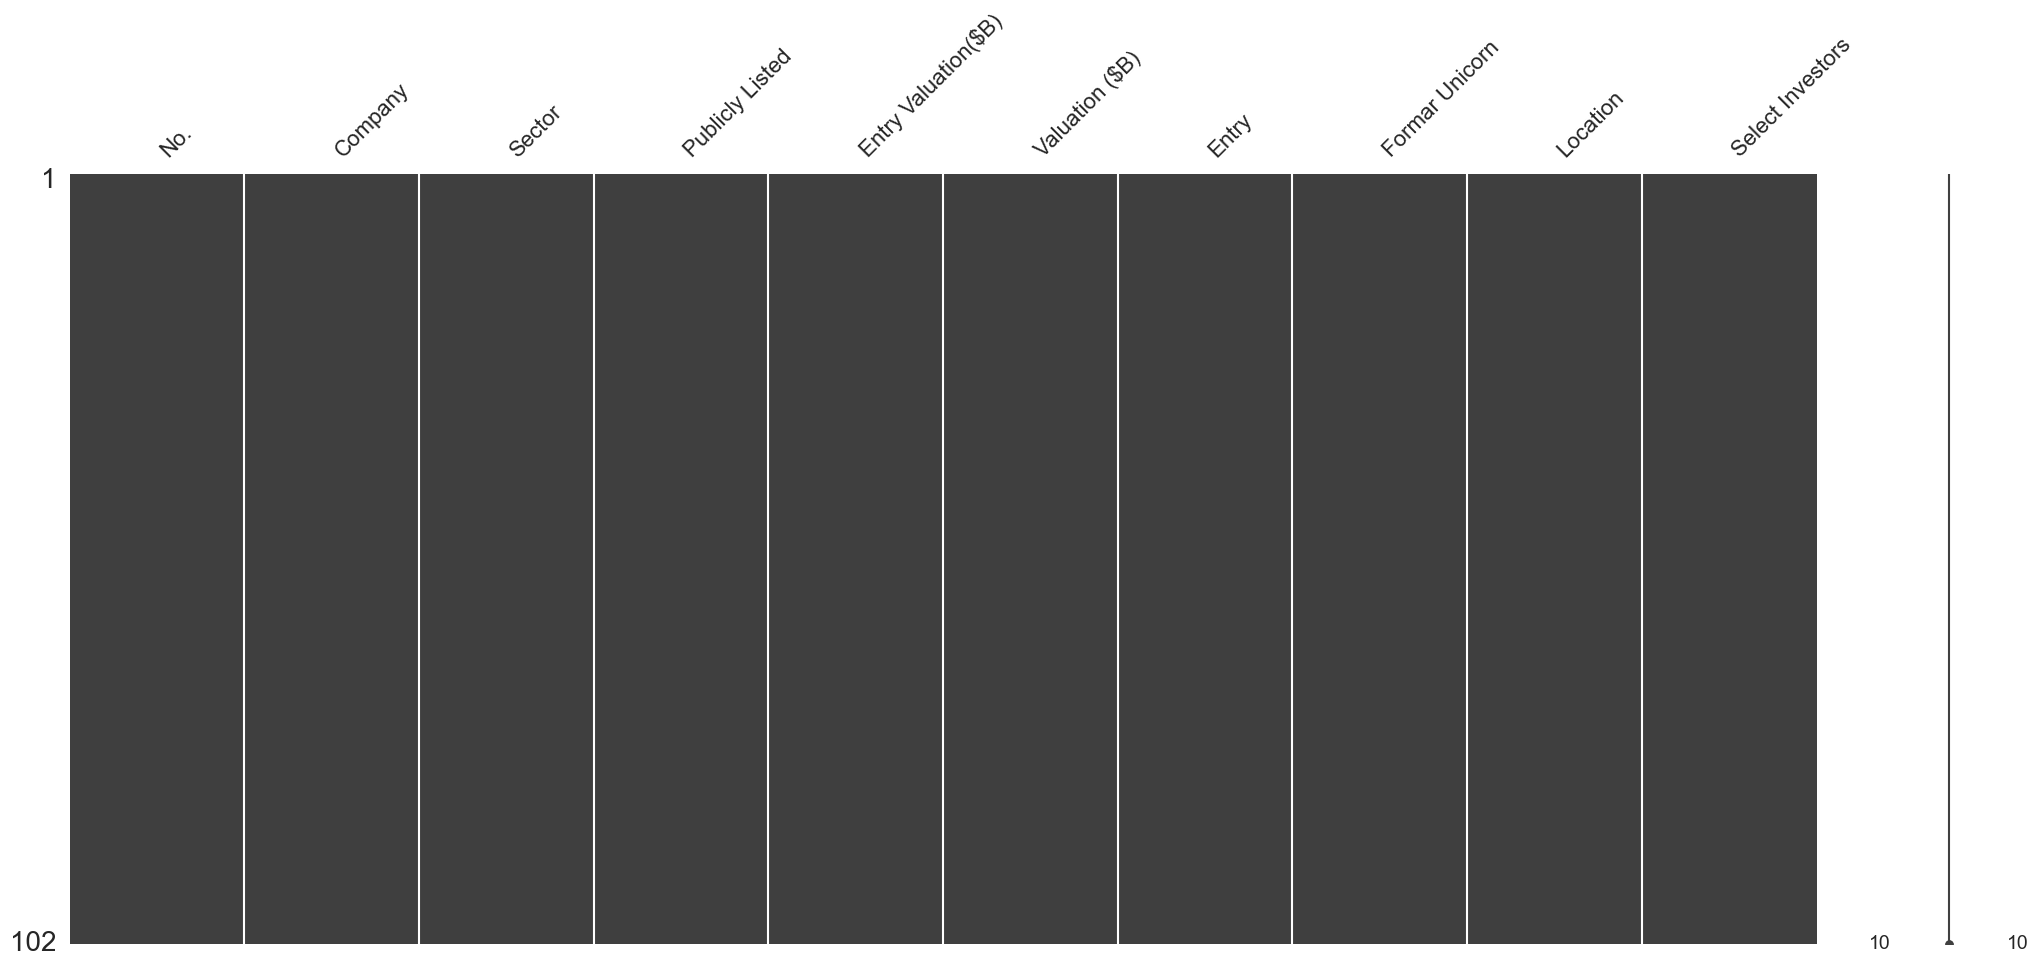

In [172]:
import missingno

missingno.matrix(unicorn)

In [173]:
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  102 non-null    int64  
 1   Company              102 non-null    object 
 2   Sector               102 non-null    object 
 3   Publicly Listed      102 non-null    int64  
 4   Entry Valuation($B)  102 non-null    float64
 5   Valuation ($B)       102 non-null    float64
 6   Entry                102 non-null    object 
 7   Formar Unicorn       102 non-null    int64  
 8   Location             102 non-null    object 
 9   Select Investors     102 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 8.1+ KB


In [174]:
unicorn.isnull().sum()

No.                    0
Company                0
Sector                 0
Publicly Listed        0
Entry Valuation($B)    0
Valuation ($B)         0
Entry                  0
Formar Unicorn         0
Location               0
Select Investors       0
dtype: int64

In [175]:
unicorn.columns

Index(['No.', 'Company', 'Sector', 'Publicly Listed ', 'Entry Valuation($B)',
       'Valuation ($B)', 'Entry', 'Formar Unicorn', 'Location',
       'Select Investors'],
      dtype='object')

<AxesSubplot: xlabel='Publicly Listed ', ylabel='count'>

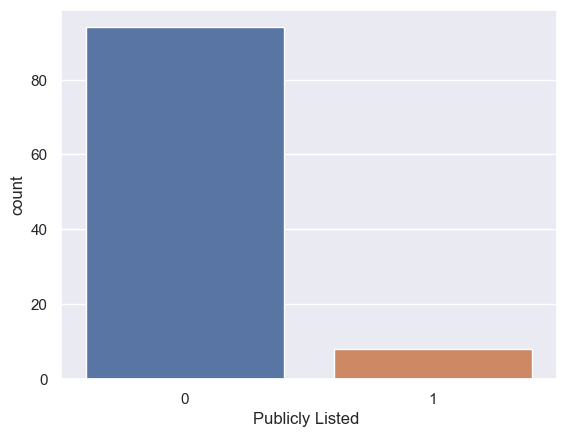

In [176]:
sns.countplot(x=unicorn['Publicly Listed '])

C:\Users\shubham\AppData\Local\Temp\ipykernel_10556\3141662813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unicorn['Entry Valuation($B)'])


<AxesSubplot: xlabel='Entry Valuation($B)', ylabel='Density'>

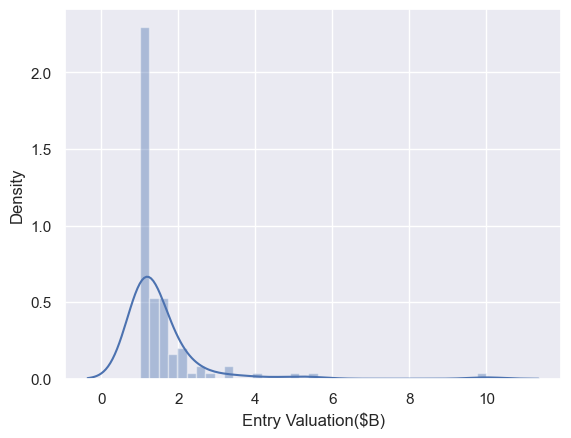

In [177]:
sns.distplot(unicorn['Entry Valuation($B)'])

<AxesSubplot: xlabel='Entry Valuation($B)'>

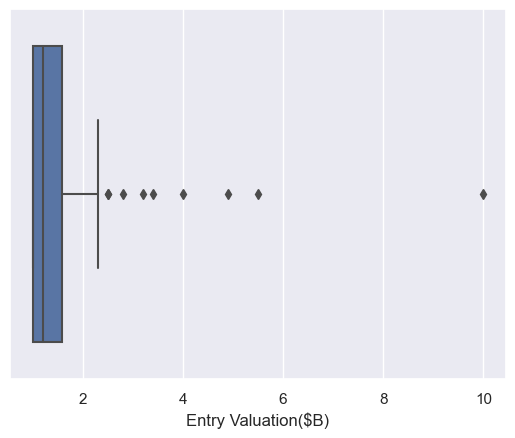

In [178]:
sns.boxplot(x=unicorn['Entry Valuation($B)'])

C:\Users\shubham\AppData\Local\Temp\ipykernel_10556\2894069371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unicorn['Valuation ($B)'])


<AxesSubplot: xlabel='Valuation ($B)', ylabel='Density'>

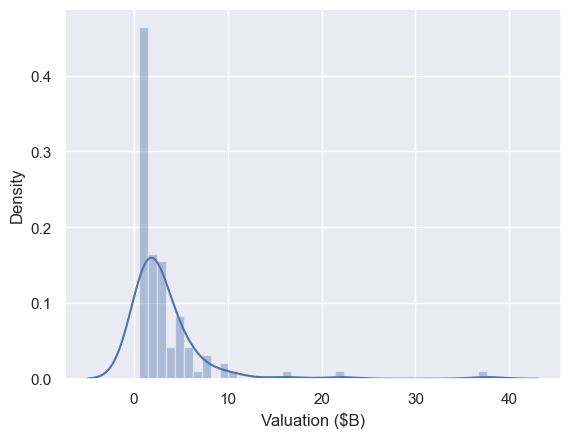

In [179]:
sns.distplot(unicorn['Valuation ($B)'])

<AxesSubplot: xlabel='Valuation ($B)'>

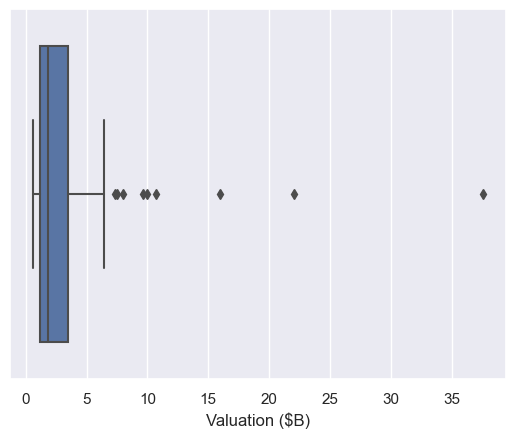

In [180]:
sns.boxplot(x=unicorn['Valuation ($B)'])

<AxesSubplot: xlabel='Formar Unicorn', ylabel='count'>

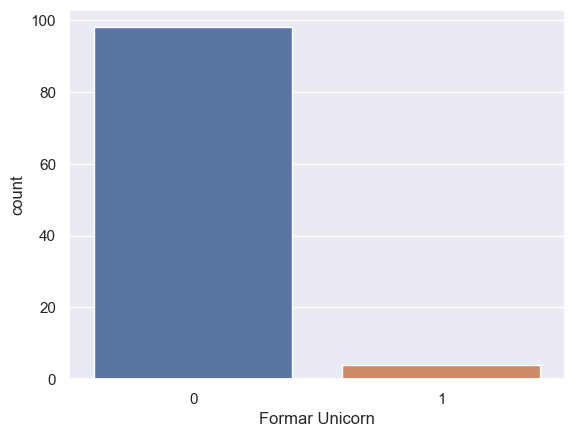

In [181]:
sns.countplot(x=unicorn['Formar Unicorn'])

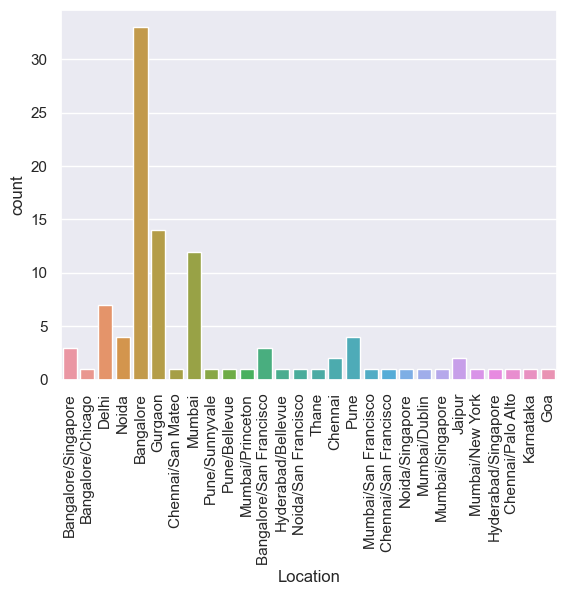

In [182]:
sns.countplot(x=unicorn['Location'])
plt.xticks(rotation=90)
plt.show()

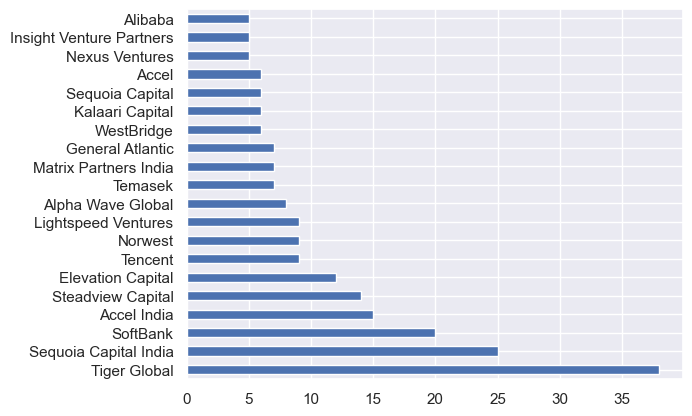

<AxesSubplot: >

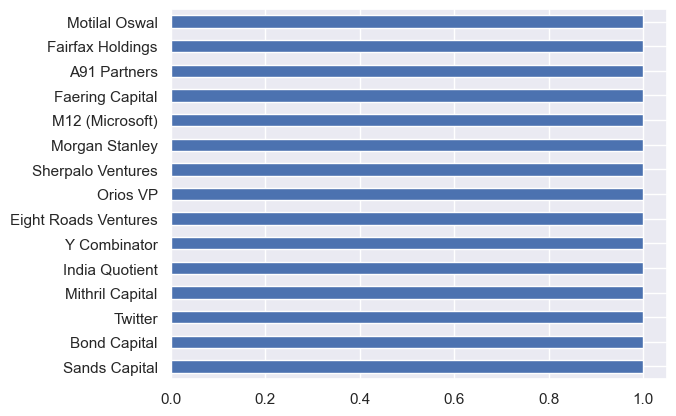

In [183]:
inv= []

for i in unicorn['Select Investors']:
    v = i.split(',')
    for w in v:
        c = w.strip()
        inv.append(c)

inv = pd.Index(inv)
inv.value_counts().head(20).plot(kind='barh')
plt.show()
inv.value_counts().tail(15).plot(kind='barh')




In [184]:
inv = set(inv)
len(inv)

162

In [185]:
uni_ent= unicorn.sort_values(by=['Entry Valuation($B)'],ascending=False)


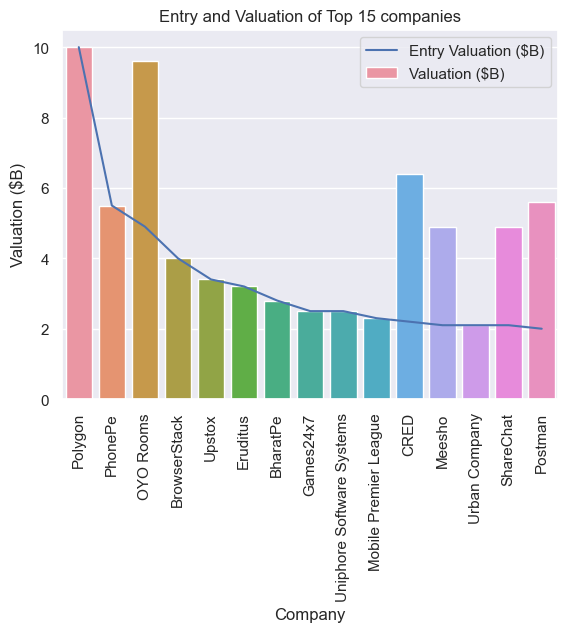

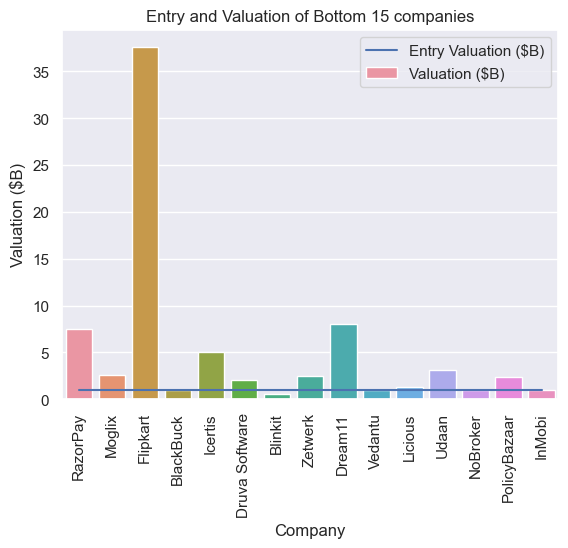

In [186]:
plt.title('Entry and Valuation of Top 15 companies')
sns.lineplot(x=uni_ent['Company'].head(15),y=uni_ent['Entry Valuation($B)'].head(15),label='Entry Valuation ($B)')
sns.barplot(x=uni_ent['Company'].head(15),y=uni_ent['Valuation ($B)'].head(15),label='Valuation ($B)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

plt.title('Entry and Valuation of Bottom 15 companies')
sns.lineplot(x=uni_ent['Company'].tail(15),y=uni_ent['Entry Valuation($B)'].tail(15),label='Entry Valuation ($B)')
sns.barplot(x=uni_ent['Company'].tail(15),y=uni_ent['Valuation ($B)'].tail(15),label='Valuation ($B)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [187]:
uni_val= unicorn.sort_values(by=['Valuation ($B)'],ascending=False)

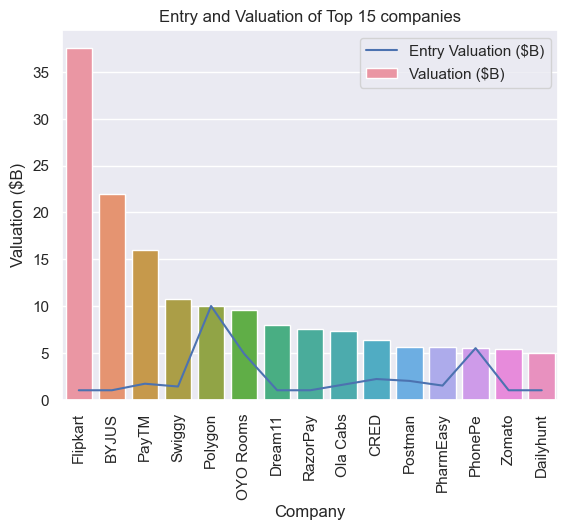

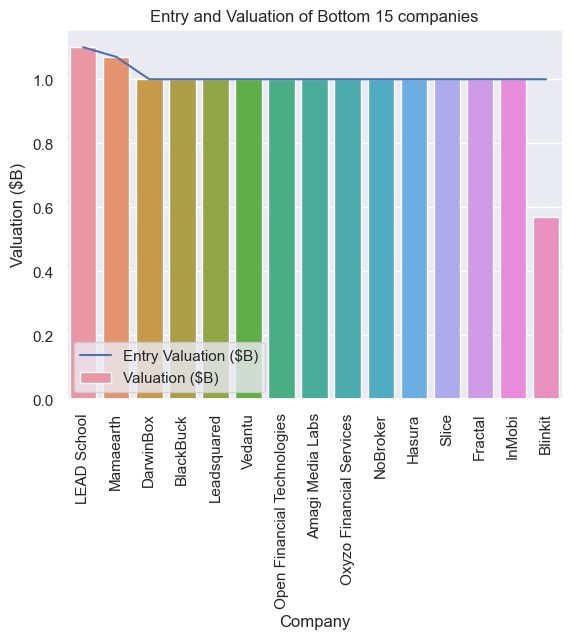

In [188]:
plt.title('Entry and Valuation of Top 15 companies')
sns.lineplot(x=uni_val['Company'].head(15),y=uni_val['Entry Valuation($B)'].head(15),label='Entry Valuation ($B)')
sns.barplot(x=uni_val['Company'].head(15),y=uni_val['Valuation ($B)'].head(15),label='Valuation ($B)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

plt.title('Entry and Valuation of Bottom 15 companies')
sns.lineplot(x=uni_val['Company'].tail(15),y=uni_val['Entry Valuation($B)'].tail(15),label='Entry Valuation ($B)')
sns.barplot(x=uni_val['Company'].tail(15),y=uni_val['Valuation ($B)'].tail(15),label='Valuation ($B)')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [189]:
for i in unicorn['Sector']:
    print(i)

Adtech - Mobile Ads
E-Commerce
SaaS - Analytics
E-Commerce
Fintech - Payments & Wallet
Mobility - Ride Aggregator
Marketplace - Classifieds
Foodtech
E-Commerce
Social Media - Messaging
Edtech
E-Commerce
Foodtech
Fintech - Insurance
SaaS - CRM
Proptech - Hotel Booking
B2B E-Commerce
Fintech - B2B Payments
Logistics Services
Logistics Services - Trucks
E-Commerce - Groceries
Gaming
SaaS - Data Management
SaaS - Contract Management
IT Services - Healthcare
Mobility - Electric
E-Commerce - Eyewear
Fintech - PoS Payment Solutions
E-Commerce - Personal Care & Cosmetics
SaaS - API Development & Testing
Edtech
Fintech - Payment Gateway
Marketplace - Used Cars
Fintech - Payments
SaaS - Salon & Spa Management
Content - News
Content - Lockscreen
Fintech - General Insurance
SaaS - Healthcare Data Analytics
B2B E-Commerce - Construction Materials
NBFC
E-Commerce - Baby Care Products
E-Commerce - Social Commerce
Fintech - Payments & Credit Card Rewards
E-Commerce - Online Pharmacy
Fintech - Brokerag

In [190]:
import re

In [191]:
unicorn['Sector'] = unicorn['Sector'].apply(lambda x : re.sub('[ ][-][ ][\w_\s_\d]+','',x))

In [192]:
unicorn['Sector'] = unicorn['Sector'].apply(lambda x : re.sub('[&][ ][\w_\s_\d]+','',x))

In [193]:
unicorn['Sector'] = unicorn['Sector'].apply(lambda x : re.sub('[-][ ][\w_\s_\d]+','',x))

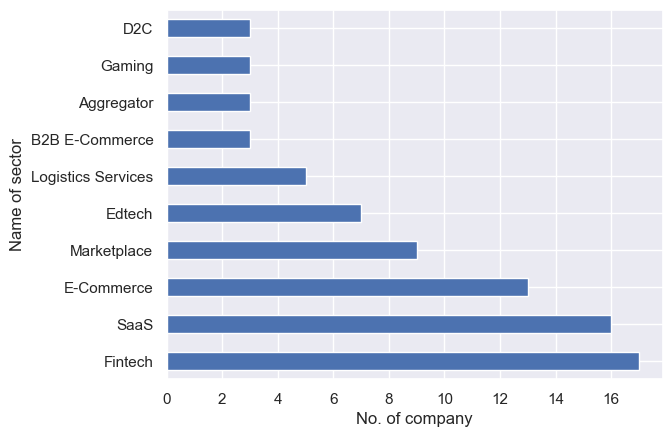

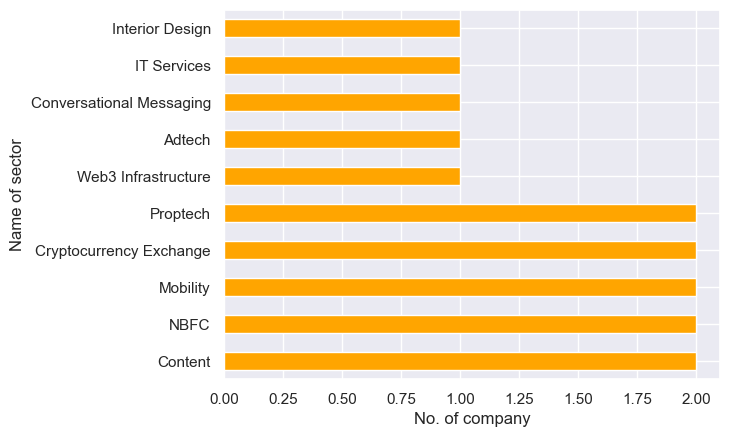

In [194]:
sec= []
for i in unicorn['Sector']:
    sec.append(i)

sec = pd.Index(sec)
sec.value_counts().head(10).plot(kind='barh')
plt.xlabel('No. of company')
plt.ylabel('Name of sector')
plt.show()
sec.value_counts().tail(10).plot(kind='barh',color='orange')
plt.xlabel('No. of company')
plt.ylabel('Name of sector')
plt.show()

In [195]:
unicorn['Location'].value_counts()

Bangalore                  33
Gurgaon                    14
Mumbai                     12
Delhi                       7
Noida                       4
Pune                        4
Bangalore/Singapore         3
Bangalore/San Francisco     3
Jaipur                      2
Chennai                     2
Mumbai/Dublin               1
Mumbai/Singapore            1
Hyderabad/Singapore         1
Mumbai/New York             1
Chennai/San Francisco       1
Chennai/Palo Alto           1
Karnataka                   1
Noida/Singapore             1
Thane                       1
Mumbai/San Francisco        1
Bangalore/Chicago           1
Noida/San Francisco         1
Hyderabad/Bellevue          1
Mumbai/Princeton            1
Pune/Bellevue               1
Pune/Sunnyvale              1
Chennai/San Mateo           1
Goa                         1
Name: Location, dtype: int64

In [196]:
unicorn.replace({'Bangalore/Singapore':'Banglore','Bangalore/San Francisco':'Banglore','Mumbai/Dublin':'Mumbai',
'Mumbai/Singapore':'Mumbai',
'Hyderabad/Singapore':'Hyderabad',
'Mumbai/New York':'Mumbai',
'Chennai/San Francisco':'Chennai',
'Chennai/Palo Alto':'Chennai',
'Noida/Singapore':'Noida',
'Mumbai/San Francisco':'Mumbai',
'Bangalore/Chicago':'Bangalore',
'Noida/San Francisco':'Noida',
'Hyderabad/Bellevue':'Hyderabad',
'Mumbai/Princeton':'Mumbai',
'Pune/Bellevue':'Pune',
'Pune/Sunnyvale':'Pune',
'Chennai/San Mateo':'Chennai'},inplace=True)

<AxesSubplot: >

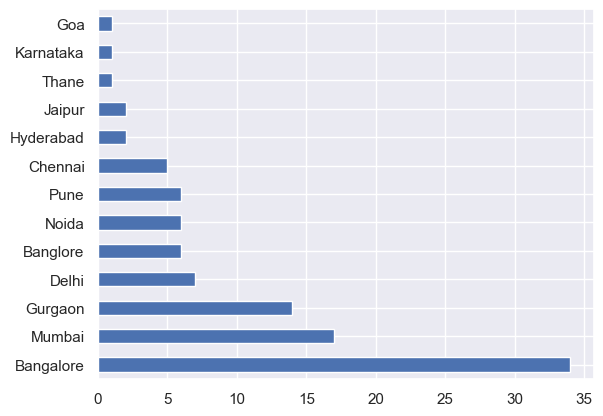

In [197]:
unicorn['Location'].value_counts().plot(kind='barh')

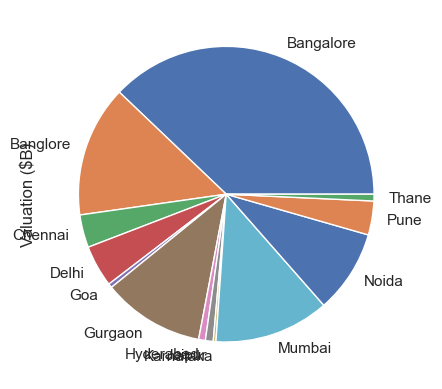

In [198]:
unicorn.groupby('Location')['Valuation ($B)'].sum().plot(kind='pie')
plt.show()

In [199]:
print('Sum of Valuation by each sector\n',unicorn.groupby('Sector')['Valuation ($B)'].sum().sort_values(ascending=False).head(10))
print('*'*50)
print('Sum of Valuation by each sector and company\n',unicorn.groupby(['Company','Sector'])['Valuation ($B)'].min().sort_values().head(10))
print('*'*50)
print(unicorn.groupby(['Company','Sector'])['Valuation ($B)'].max().sort_values(ascending=False).head(10))

Sum of Valuation by each sector
 Sector
E-Commerce             67.968
Fintech                64.500
SaaS                   38.500
Edtech                 34.050
Foodtech               17.500
Marketplace            16.000
Gaming                 12.800
Mobility               12.300
Proptech               10.600
Web3 Infrastructure    10.000
Name: Valuation ($B), dtype: float64
**************************************************
Sum of Valuation by each sector and company
 Company           Sector            
Blinkit           E-Commerce            0.568
DarwinBox         SaaS                  1.000
Amagi Media Labs  SaaS                  1.000
Vedantu           Edtech                1.000
Slice             Fintech               1.000
Hasura            SaaS                  1.000
InMobi            Adtech                1.000
Leadsquared       SaaS                  1.000
BlackBuck         Logistics Services    1.000
Fractal           SaaS                  1.000
Name: Valuation ($B), dtype: f

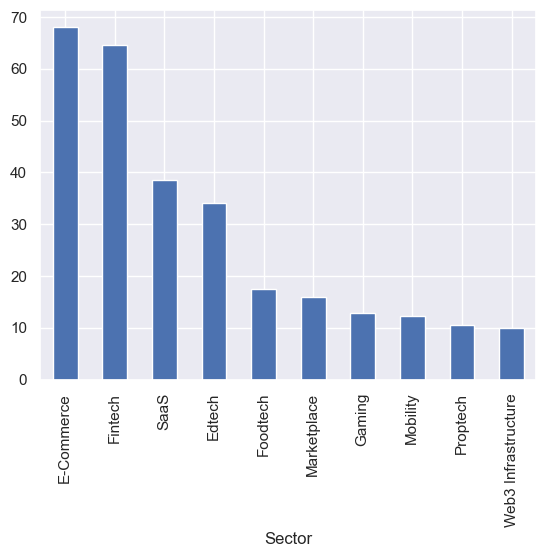

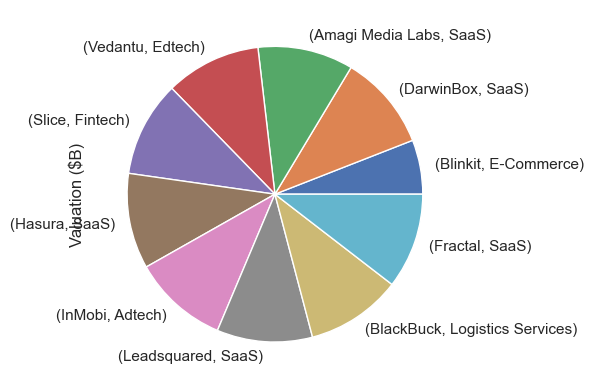

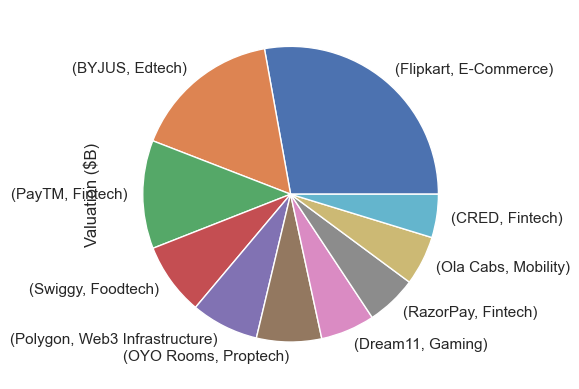

In [200]:
unicorn.groupby('Sector')['Valuation ($B)'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()
unicorn.groupby(['Company','Sector'])['Valuation ($B)'].min().sort_values().head(10).plot(kind='pie')
plt.show()
unicorn.groupby(['Company','Sector'])['Valuation ($B)'].max().sort_values(ascending=False).head(10).plot(kind='pie')
plt.show()

In [201]:
print('Sum of Valuation by each Location\n',unicorn.groupby('Location')['Valuation ($B)'].sum().sort_values(ascending=False).head(10))
print('*'*50)
print('Sum of Valuation by each Location and company\n',unicorn.groupby(['Company','Location'])['Valuation ($B)'].min().sort_values().head(10))
print('*'*50)
print(unicorn.groupby(['Company','Location'])['Valuation ($B)'].max().sort_values(ascending=False).head(10))

Sum of Valuation by each Location
 Location
Bangalore    128.800
Banglore      48.900
Mumbai        42.800
Gurgaon       37.938
Noida         30.900
Delhi         15.530
Pune          12.600
Chennai       12.200
Jaipur         2.900
Hyderabad      2.500
Name: Valuation ($B), dtype: float64
**************************************************
Sum of Valuation by each Location and company
 Company           Location 
Blinkit           Gurgaon      0.568
DarwinBox         Hyderabad    1.000
Amagi Media Labs  Bangalore    1.000
Vedantu           Bangalore    1.000
Slice             Bangalore    1.000
Hasura            Bangalore    1.000
InMobi            Banglore     1.000
Leadsquared       Bangalore    1.000
BlackBuck         Bangalore    1.000
Fractal           Mumbai       1.000
Name: Valuation ($B), dtype: float64
**************************************************
Company    Location 
Flipkart   Banglore     37.6
BYJUS      Bangalore    22.0
PayTM      Noida        16.0
Swiggy     Bangal

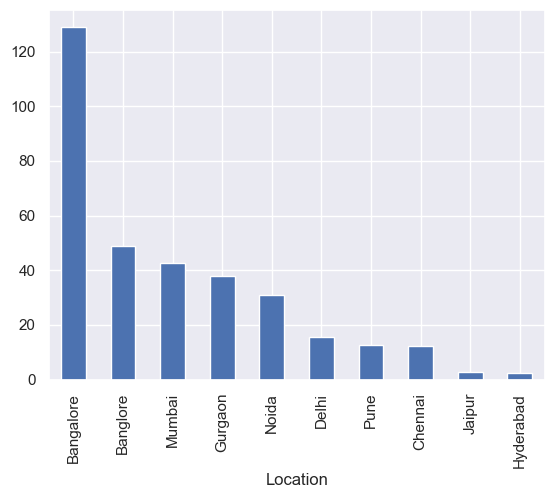

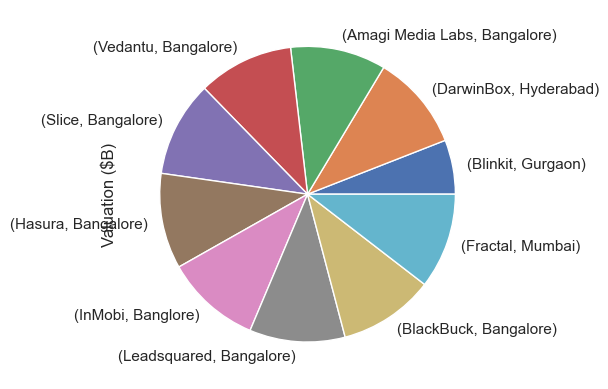

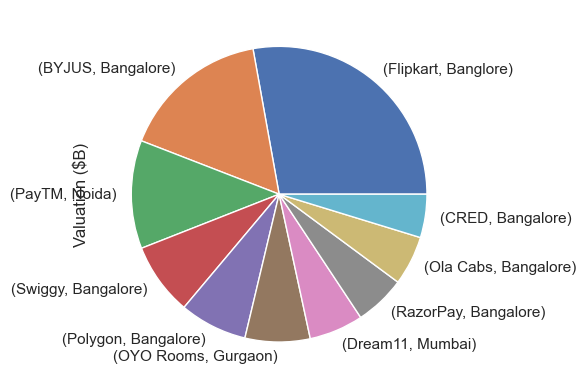

In [202]:
unicorn.groupby('Location')['Valuation ($B)'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()
unicorn.groupby(['Company','Location'])['Valuation ($B)'].min().sort_values().head(10).plot(kind='pie')
plt.show()
unicorn.groupby(['Company','Location'])['Valuation ($B)'].max().sort_values(ascending=False).head(10).plot(kind='pie')
plt.show()

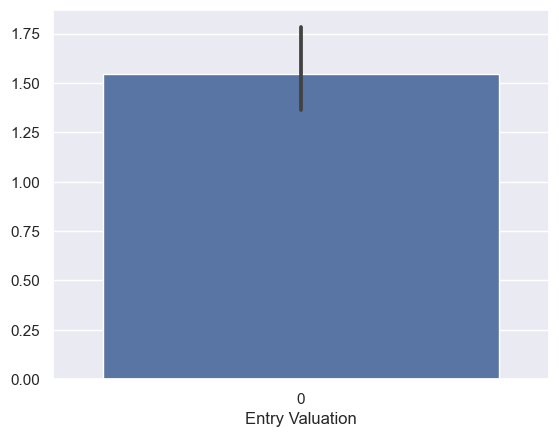

Text(0.5, 0, 'Valuation')

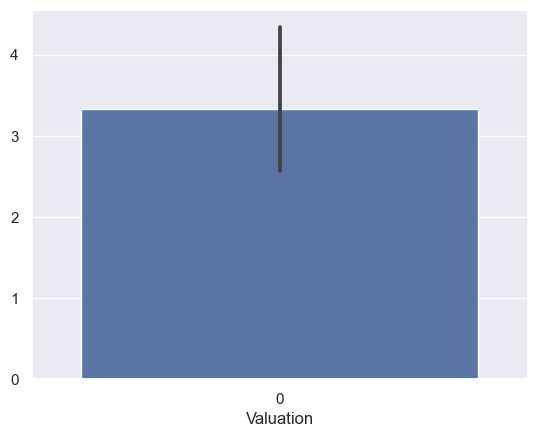

In [203]:
sns.barplot(unicorn['Entry Valuation($B)'])
plt.xlabel('Entry Valuation')
plt.show()
sns.barplot(unicorn['Valuation ($B)'])
plt.xlabel('Valuation')

In [204]:
print('Sum of Valuation by each Company,sector,Location\n',unicorn.groupby(['Company','Sector','Location'])['Valuation ($B)'].sum().sort_values(ascending=False).head(10))
print('*'*50)
print('Sum of Valuation by each Comapny,Location and Sector\n',unicorn.groupby(['Company','Sector','Location'])['Valuation ($B)'].min().sort_values().head(10))
print('*'*50)
print(unicorn.groupby(['Company','Sector','Location'])['Valuation ($B)'].max().sort_values(ascending=False).head(10))

Sum of Valuation by each Company,sector,Location
 Company    Sector               Location 
Flipkart   E-Commerce           Banglore     37.6
BYJUS      Edtech               Bangalore    22.0
PayTM      Fintech              Noida        16.0
Swiggy     Foodtech             Bangalore    10.7
Polygon    Web3 Infrastructure  Bangalore    10.0
OYO Rooms  Proptech             Gurgaon       9.6
Dream11    Gaming               Mumbai        8.0
RazorPay   Fintech              Bangalore     7.5
Ola Cabs   Mobility             Bangalore     7.3
CRED       Fintech              Bangalore     6.4
Name: Valuation ($B), dtype: float64
**************************************************
Sum of Valuation by each Comapny,Location and Sector
 Company           Sector              Location 
Blinkit           E-Commerce          Gurgaon      0.568
DarwinBox         SaaS                Hyderabad    1.000
Amagi Media Labs  SaaS                Bangalore    1.000
Vedantu           Edtech              Bangalore

In [205]:
uni_fin = unicorn[unicorn['Sector']=='Fintech']
uni_fin.reset_index(drop=True)
uni_fin.sort_values(by=['Valuation ($B)'],ascending=False,inplace=True)

C:\Users\shubham\AppData\Local\Temp\ipykernel_10556\3453841748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_fin.sort_values(by=['Valuation ($B)'],ascending=False,inplace=True)


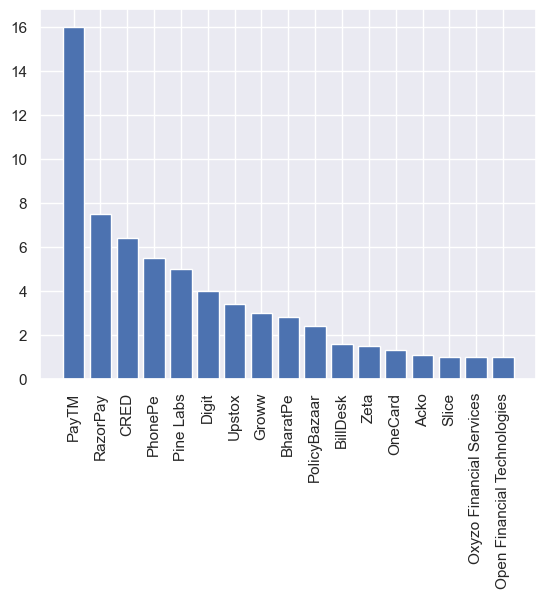

In [206]:
plt.bar(uni_fin['Company'],uni_fin['Valuation ($B)'])
plt.xticks(rotation=90)
plt.show()

In [207]:
uni_eco = unicorn[unicorn['Sector']=='E-Commerce']
uni_eco.reset_index(drop=True)
uni_eco.sort_values(by=['Valuation ($B)'],ascending=False,inplace=True)

C:\Users\shubham\AppData\Local\Temp\ipykernel_10556\598588617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_eco.sort_values(by=['Valuation ($B)'],ascending=False,inplace=True)


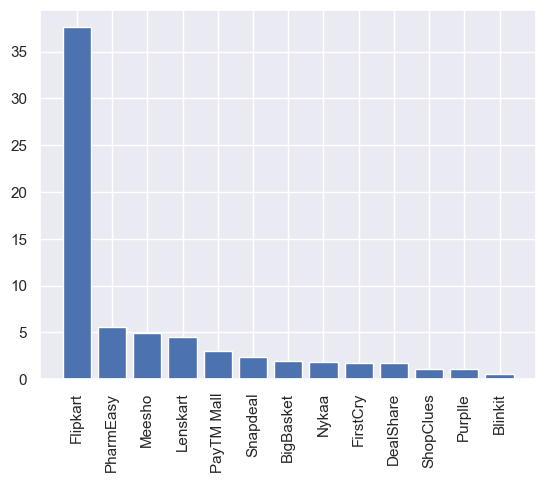

In [208]:
plt.bar(uni_eco['Company'],uni_eco['Valuation ($B)'])
plt.xticks(rotation=90)
plt.show()

In [211]:
uni_sas = unicorn[unicorn['Sector']=='SaaS']
uni_sas.reset_index(drop=True)
uni_sas.sort_values(by=['Valuation ($B)'],ascending=False,inplace=True)

C:\Users\shubham\AppData\Local\Temp\ipykernel_10556\2805482063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_sas.sort_values(by=['Valuation ($B)'],ascending=False,inplace=True)


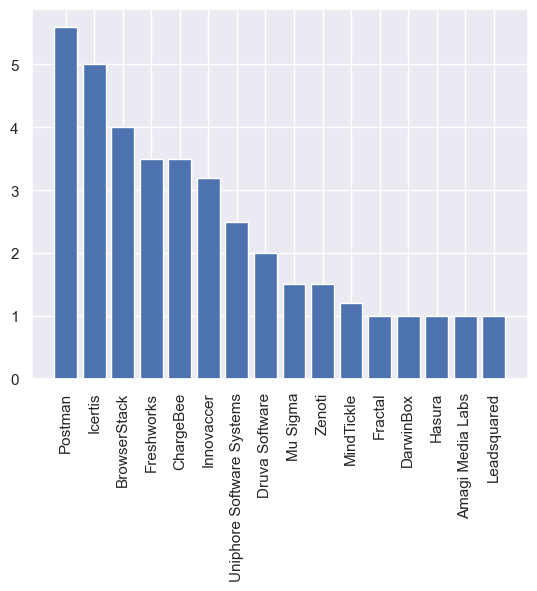

In [212]:
plt.bar(uni_sas['Company'],uni_sas['Valuation ($B)'])
plt.xticks(rotation=90)
plt.show()